In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [15]:
!tar -xvf /content/drive/MyDrive/중앙대학교/3학년1학기/AI딥러닝IoT가전응용영상인식/Dataset/pose.tar.gz

pose/
pose/test/
pose/test/notdrowsy/
pose/test/notdrowsy/leey_image151.jpg
pose/test/notdrowsy/kyuwon_image364.jpg
pose/test/notdrowsy/joe_image2327.jpg
pose/test/notdrowsy/leewh_image324.jpg
pose/test/notdrowsy/joe_image2321.jpg
pose/test/notdrowsy/leey_image154.jpg
pose/test/notdrowsy/leey_image153.jpg
pose/test/notdrowsy/joe_image2326.jpg
pose/test/notdrowsy/leewh_image321.jpg
pose/test/notdrowsy/kyuwon_image361.jpg
pose/test/notdrowsy/leey_image160.jpg
pose/test/notdrowsy/joe_image2328.jpg
pose/test/notdrowsy/kyuwon_image369.jpg
pose/test/notdrowsy/joe_image2322.jpg
pose/test/notdrowsy/leey_image155.jpg
pose/test/notdrowsy/kyuwon_image368.jpg
pose/test/notdrowsy/leey_image159.jpg
pose/test/notdrowsy/leewh_image320.jpg
pose/test/notdrowsy/joe_image2320.jpg
pose/test/notdrowsy/kyuwon_image370.jpg
pose/test/notdrowsy/kyuwon_image363.jpg
pose/test/notdrowsy/leewh_image323.jpg
pose/test/notdrowsy/kyuwon_image362.jpg
pose/test/notdrowsy/leey_image157.jpg
pose/test/notdrowsy/kyuwon_image

In [16]:
!pip install mediapipe

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 32.9 MB 1.4 MB/s 


In [18]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import os

In [19]:
PATH_TRAIN_NOTDROWSY_LIST = os.listdir("pose/train/notdrowsy/")
PATH_TRAIN_DROWSY_LIST  = os.listdir("pose/train/drowsy/")

In [20]:
import mediapipe as mp
import numpy as np
import math

In [21]:
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

In [22]:
landmark_names = [
        'nose',
        'left_eye_inner', 'left_eye', 'left_eye_outer',
        'right_eye_inner', 'right_eye', 'right_eye_outer',
        'left_ear',
        'right_ear',
        'mouth_left', 'mouth_right',
        'left_shoulder', 'right_shoulder',
        'left_elbow', 'right_elbow',
        'left_wrist', 'right_wrist',
        'left_pinky_1', 'right_pinky_1',
        'left_index_1', 'right_index_1',
        'left_thumb_2', 'right_thumb_2',
        'left_hip', 'right_hip',
        'left_knee', 'right_knee',
        'left_ankle', 'right_ankle',
        'left_heel', 'right_heel',
        'left_foot_index', 'right_foot_index',
    ]

In [27]:
def Shoulder_Point(result, image_width, image_height) :
    if result.pose_landmarks != None:
        L_Shoulder_X = result.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER].x * image_width
        R_Shoulder_X = result.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].x * image_width
        R_Shoulder_Y = result.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER].y * image_height
        L_Shoulder_Y = result.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER].y * image_height
    
    else:
        R_Shoulder_X, R_Shoulder_Y,L_Shoulder_X, L_Shoulder_Y = None, None, None, None
        
    return R_Shoulder_X, R_Shoulder_Y,L_Shoulder_X, L_Shoulder_Y

In [28]:
def Compute_Neck(result, image_width, image_height) :
    R_Shoulder_X, R_Shoulder_Y,L_Shoulder_X, L_Shoulder_Y = Shoulder_Point(result, image_width, image_height)
    try:
        Neck_X = (L_Shoulder_X + R_Shoulder_X) / float(2.0)
        Neck_Y = (L_Shoulder_Y + R_Shoulder_Y) / float(2.0)
        
    except:
        return None, None
    return Neck_X, Neck_Y

In [29]:
def Nose_Point(result, image_width, image_height) :
    
    if result.pose_landmarks != None:
        Nose_X = result.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].x * image_width
        Nose_Y = result.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE].y * image_height
        
    else:
        return None, None

    return Nose_X, Nose_Y

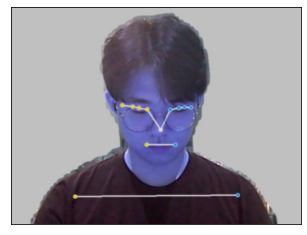

(141.7075538635254, 416.33617401123047, 500.7600402832031, 419.9220371246338)



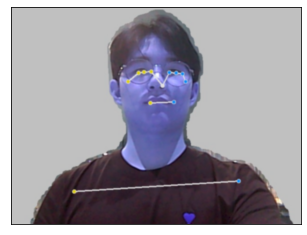

(139.9291229248047, 385.1269340515137, 502.591552734375, 408.4083366394043)



In [31]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_pose = mp.solutions.pose

# 이미지 파일 경로
IMAGE_FILES = ["pose/train/drowsy/kyuwon_image201.jpg", "pose/train/notdrowsy/kyuwon_image1.jpg"]
BG_COLOR = (192, 192, 192) # gray
with mp_pose.Pose(static_image_mode = True,
                  model_complexity = 2,
                  enable_segmentation = True,
                  min_detection_confidence = 0.5) as pose:

  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    image_height, image_width, _ = image.shape
    # Convert the BGR image to RGB before processing.
    results = pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    if not results.pose_landmarks:
      continue

    
    annotated_image = image.copy()
    # Draw segmentation on the image.
    # To improve segmentation around boundaries, consider applying a joint
    # bilateral filter to "results.segmentation_mask" with "image".
    condition = np.stack((results.segmentation_mask,) * 3, axis=-1) > 0.1
    bg_image = np.zeros(image.shape, dtype=np.uint8)
    bg_image[:] = BG_COLOR
    annotated_image = np.where(condition, annotated_image, bg_image)
    # Draw pose landmarks on the image.
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', annotated_image)
    # Plot pose world landmarks.
    
    #mp_drawing.plot_landmarks(
     #   results.pose_world_landmarks, mp_pose.POSE_CONNECTIONS)
    
    mp_drawing.draw_landmarks(
        annotated_image,
        results.pose_landmarks,
        mp_pose.POSE_CONNECTIONS,
        landmark_drawing_spec=mp_drawing_styles.get_default_pose_landmarks_style())
    
    cv2.imwrite("test.jpg",annotated_image)
    check = cv2.imread("test.jpg")
    plt.imshow(check, interpolation='bicubic')
    plt.xticks([])
    plt.yticks([])
    plt.show()

    cv2.waitKey(0)
    cv2.destroyAllWindows()

    print(Shoulder_Point(results, image_width, image_height))
    print()

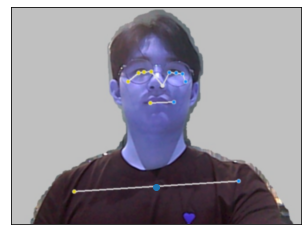

Shoulder_Position : (139.9291229248047, 385.1269340515137, 502.591552734375, 408.4083366394043)
Neck_Position : (321.26033782958984, 396.767635345459)
Nose_Position : (334.33204650878906, 175.10101318359375)


In [33]:
check = cv2.imread("test.jpg")
plt.imshow(check, interpolation='bicubic')
plt.xticks([])
plt.yticks([])
x,y = Compute_Neck(results, image_width, image_height)
plt.scatter(x,y)
plt.show()

cv2.waitKey(0)
cv2.destroyAllWindows()

print("Shoulder_Position :", Shoulder_Point(results, image_width, image_height))
print("Neck_Position :", Compute_Neck(results, image_width, image_height))
print("Nose_Position :", Nose_Point(results, image_width, image_height))

In [34]:
def Point_by_MediaPipe(image_path, train_test, label):
    mp_drawing = mp.solutions.drawing_utils
    mp_drawing_styles = mp.solutions.drawing_styles
    mp_pose = mp.solutions.pose
    if train_test == "train":
        train_test = "train/"
    else:
        train_test = "test/"
    
    if label == "drowsy":
        label = "drowsy/"
    else:
        label = "notdrowsy/"
        
# For static images:
    IMAGE_FILES = image_path
    results = []
    BG_COLOR = (192, 192, 192) # gray
    with mp_pose.Pose(
        static_image_mode=True,
        model_complexity=2,
        enable_segmentation=True,
        min_detection_confidence=0.5) as pose:
        for idx, file in enumerate(IMAGE_FILES):
            file = "pose/" + train_test + label + file
            image = cv2.imread(file)
            
            
            image_height, image_width, _ = image.shape
            results.append(pose.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)))
                
            if not results[idx].pose_landmarks:
                continue
                
            if idx % 10 == 0:
                print("전체 이미지 : %d / 완료한 이미지 %d" % (len(IMAGE_FILES), idx))
                
    print("---완료---")
    return results, image_height, image_width

In [35]:
drowsy_results, image_height, image_width = Point_by_MediaPipe(PATH_TRAIN_DROWSY_LIST, "train", "drowsy")
notdrowsy_results, image_height, image_width = Point_by_MediaPipe(PATH_TRAIN_NOTDROWSY_LIST, "train", "notdrowsy")

전체 이미지 : 600 / 완료한 이미지 0
전체 이미지 : 600 / 완료한 이미지 10
전체 이미지 : 600 / 완료한 이미지 20
전체 이미지 : 600 / 완료한 이미지 30
전체 이미지 : 600 / 완료한 이미지 40
전체 이미지 : 600 / 완료한 이미지 50
전체 이미지 : 600 / 완료한 이미지 60
전체 이미지 : 600 / 완료한 이미지 70
전체 이미지 : 600 / 완료한 이미지 80
전체 이미지 : 600 / 완료한 이미지 90
전체 이미지 : 600 / 완료한 이미지 100
전체 이미지 : 600 / 완료한 이미지 110
전체 이미지 : 600 / 완료한 이미지 120
전체 이미지 : 600 / 완료한 이미지 130
전체 이미지 : 600 / 완료한 이미지 140
전체 이미지 : 600 / 완료한 이미지 150
전체 이미지 : 600 / 완료한 이미지 160
전체 이미지 : 600 / 완료한 이미지 170
전체 이미지 : 600 / 완료한 이미지 180
전체 이미지 : 600 / 완료한 이미지 190
전체 이미지 : 600 / 완료한 이미지 200
전체 이미지 : 600 / 완료한 이미지 210
전체 이미지 : 600 / 완료한 이미지 220
전체 이미지 : 600 / 완료한 이미지 230
전체 이미지 : 600 / 완료한 이미지 240
전체 이미지 : 600 / 완료한 이미지 250
전체 이미지 : 600 / 완료한 이미지 260
전체 이미지 : 600 / 완료한 이미지 270
전체 이미지 : 600 / 완료한 이미지 280
전체 이미지 : 600 / 완료한 이미지 290
전체 이미지 : 600 / 완료한 이미지 300
전체 이미지 : 600 / 완료한 이미지 310
전체 이미지 : 600 / 완료한 이미지 320
전체 이미지 : 600 / 완료한 이미지 330
전체 이미지 : 600 / 완료한 이미지 340
전체 이미지 : 600 / 완료한 이미지 350
전체 이미지 : 600 / 완료한 이미지 360
전체 이미지 : 600

In [36]:
len(drowsy_results)

600

In [37]:
len(notdrowsy_results)

646

In [38]:
def Point_DataFrame(results, label):
    point_list = []
    if label == 0 or label == "notdrowsy":
        label = 0
    elif label == 1 or label == "drowsy":
        label = 1
    else:
        label = -1
    for result in results:
        temp = []
        Neck_X, Neck_Y = Compute_Neck(result, image_width, image_height)
        Nose_X, Nose_Y = Nose_Point(result, image_width, image_height)
        R_Shoulder_X, R_Shoulder_Y,L_Shoulder_X, L_Shoulder_Y = Shoulder_Point(result, image_width, image_height)
        temp.append(Neck_X)
        temp.append(Neck_Y)
        temp.append(Nose_X)
        temp.append(Nose_Y)
        temp.append(R_Shoulder_X)
        temp.append(R_Shoulder_Y)
        temp.append(L_Shoulder_X)
        temp.append(L_Shoulder_Y)
        temp.append(label)
        point_list.append(temp)
    dataframe = pd.DataFrame(columns = ["Neck_X", "Neck_Y", "Nose_X", "Nose_Y", "R_Shoulder_X", "R_Shoulder_Y","L_Shoulder_X", "L_Shoulder_Y", "label"],
                 data = point_list)
    return dataframe

In [39]:
train_data_drowsy = Point_DataFrame(drowsy_results, "drowsy")
train_data_notdrowsy = Point_DataFrame(notdrowsy_results, "notdrowsy")

In [40]:
train_data_drowsy.head(7)

,Neck_X,Neck_Y,Nose_X,Nose_Y,R_Shoulder_X,R_Shoulder_Y,L_Shoulder_X,L_Shoulder_Y,label
0,313.540735,433.734384,293.685455,190.180149,145.539989,423.473454,481.541481,443.995314,1
1,309.636641,434.462457,440.382233,296.424351,135.205441,440.932159,484.067841,427.992754,1
2,320.195417,421.544209,298.888855,206.400547,148.138332,414.554014,492.252502,428.534403,1
3,341.283541,473.491588,334.505157,399.966316,150.111103,471.265612,532.455978,475.717564,1
4,305.599127,424.864168,189.642811,306.388292,127.656231,391.637363,483.542023,458.090973,1
5,325.085812,412.613397,397.870445,290.921745,177.074394,426.727123,473.097229,398.499670,1
6,344.401646,417.182565,359.345055,286.738844,176.619682,421.021671,512.183609,413.343458,1


In [41]:
train_data_notdrowsy.head(7)

,Neck_X,Neck_Y,Nose_X,Nose_Y,R_Shoulder_X,R_Shoulder_Y,L_Shoulder_X,L_Shoulder_Y,label
0,323.789253,410.360599,335.738258,172.653937,145.304718,402.578001,502.273788,418.143196,0
1,380.477228,494.232845,377.126884,320.217762,198.265171,488.461418,562.689285,500.004272,0
2,333.948097,412.688842,321.216431,169.600525,155.679016,406.452169,512.217178,418.925514,0
3,312.149858,464.593821,352.141685,275.141716,138.865681,459.516735,485.434036,469.670906,0
4,351.065989,379.710274,360.112991,181.611729,172.735538,378.826418,529.396439,380.594130,0
5,318.422985,413.968263,326.210098,177.683086,141.251602,407.657833,495.594368,420.278692,0
6,318.514347,420.510836,341.844864,180.486832,140.644836,412.427559,496.383858,428.594112,0


In [42]:
train_data_drowsy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Neck_X        592 non-null    float64
 1   Neck_Y        592 non-null    float64
 2   Nose_X        592 non-null    float64
 3   Nose_Y        592 non-null    float64
 4   R_Shoulder_X  592 non-null    float64
 5   R_Shoulder_Y  592 non-null    float64
 6   L_Shoulder_X  592 non-null    float64
 7   L_Shoulder_Y  592 non-null    float64
 8   label         600 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 42.3 KB


In [43]:
train_data_notdrowsy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Neck_X        645 non-null    float64
 1   Neck_Y        645 non-null    float64
 2   Nose_X        645 non-null    float64
 3   Nose_Y        645 non-null    float64
 4   R_Shoulder_X  645 non-null    float64
 5   R_Shoulder_Y  645 non-null    float64
 6   L_Shoulder_X  645 non-null    float64
 7   L_Shoulder_Y  645 non-null    float64
 8   label         646 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 45.5 KB


In [44]:
train_data_drowsy = train_data_drowsy.dropna()
train_data_notdrowsy = train_data_notdrowsy.dropna()

In [45]:
train_data_drowsy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 592 entries, 0 to 599
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Neck_X        592 non-null    float64
 1   Neck_Y        592 non-null    float64
 2   Nose_X        592 non-null    float64
 3   Nose_Y        592 non-null    float64
 4   R_Shoulder_X  592 non-null    float64
 5   R_Shoulder_Y  592 non-null    float64
 6   L_Shoulder_X  592 non-null    float64
 7   L_Shoulder_Y  592 non-null    float64
 8   label         592 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 46.2 KB


In [46]:
train_data_notdrowsy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 0 to 645
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Neck_X        645 non-null    float64
 1   Neck_Y        645 non-null    float64
 2   Nose_X        645 non-null    float64
 3   Nose_Y        645 non-null    float64
 4   R_Shoulder_X  645 non-null    float64
 5   R_Shoulder_Y  645 non-null    float64
 6   L_Shoulder_X  645 non-null    float64
 7   L_Shoulder_Y  645 non-null    float64
 8   label         645 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 50.4 KB


In [47]:
def Compute_Diff(dataframe):
    dataframe["Diff_X"] = pd.Series(dataframe.loc[:, "Neck_X"] - dataframe.loc[:, "Nose_X"])
    dataframe["Diff_Y"] = pd.Series(dataframe.loc[:, "Neck_Y"] - dataframe.loc[:, "Nose_Y"])
    return dataframe

In [48]:
train_data_drowsy = Compute_Diff(train_data_drowsy)
train_data_notdrowsy = Compute_Diff(train_data_notdrowsy)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [49]:
train_data_drowsy.head(7)

,Neck_X,Neck_Y,Nose_X,Nose_Y,R_Shoulder_X,R_Shoulder_Y,L_Shoulder_X,L_Shoulder_Y,label,Diff_X,Diff_Y
0,313.540735,433.734384,293.685455,190.180149,145.539989,423.473454,481.541481,443.995314,1,19.855280,243.554235
1,309.636641,434.462457,440.382233,296.424351,135.205441,440.932159,484.067841,427.992754,1,-130.745592,138.038106
2,320.195417,421.544209,298.888855,206.400547,148.138332,414.554014,492.252502,428.534403,1,21.306562,215.143661
3,341.283541,473.491588,334.505157,399.966316,150.111103,471.265612,532.455978,475.717564,1,6.778383,73.525271
4,305.599127,424.864168,189.642811,306.388292,127.656231,391.637363,483.542023,458.090973,1,115.956316,118.475876
5,325.085812,412.613397,397.870445,290.921745,177.074394,426.727123,473.097229,398.499670,1,-72.784634,121.691651
6,344.401646,417.182565,359.345055,286.738844,176.619682,421.021671,512.183609,413.343458,1,-14.943409,130.443721


In [50]:
train_data_notdrowsy.head(7)

,Neck_X,Neck_Y,Nose_X,Nose_Y,R_Shoulder_X,R_Shoulder_Y,L_Shoulder_X,L_Shoulder_Y,label,Diff_X,Diff_Y
0,323.789253,410.360599,335.738258,172.653937,145.304718,402.578001,502.273788,418.143196,0,-11.949005,237.706661
1,380.477228,494.232845,377.126884,320.217762,198.265171,488.461418,562.689285,500.004272,0,3.350344,174.015083
2,333.948097,412.688842,321.216431,169.600525,155.679016,406.452169,512.217178,418.925514,0,12.731667,243.088317
3,312.149858,464.593821,352.141685,275.141716,138.865681,459.516735,485.434036,469.670906,0,-39.991827,189.452105
4,351.065989,379.710274,360.112991,181.611729,172.735538,378.826418,529.396439,380.594130,0,-9.047003,198.098545
5,318.422985,413.968263,326.210098,177.683086,141.251602,407.657833,495.594368,420.278692,0,-7.787113,236.285176
6,318.514347,420.510836,341.844864,180.486832,140.644836,412.427559,496.383858,428.594112,0,-23.330517,240.024004


In [51]:
train_data_notdrowsy[['Neck_X','Nose_X', "Diff_X"]]

,Neck_X,Nose_X,Diff_X
0,323.789253,335.738258,-11.949005
1,380.477228,377.126884,3.350344
2,333.948097,321.216431,12.731667
3,312.149858,352.141685,-39.991827
4,351.065989,360.112991,-9.047003
...,...,...,...
641,320.378990,385.675583,-65.296593
642,322.729912,330.605736,-7.875824
643,336.084757,345.036507,-8.951750
644,371.576281,372.485924,-0.909643


In [52]:
def Comput_Degree(dataframe):
    AB = np.sqrt((dataframe["Nose_X"] - dataframe["Neck_X"]) ** 2 + (dataframe["Nose_Y"] - dataframe["Neck_Y"]) ** 2)
    AC = np.abs(dataframe["Nose_X"] - dataframe["Neck_X"])
    cos = AC / AB
    degree = np.degrees(cos)
    dataframe.insert(0, "degree", degree, True)
    return dataframe

In [53]:
train_data_drowsy = Comput_Degree(train_data_drowsy)
train_data_notdrowsy = Comput_Degree(train_data_notdrowsy)

In [54]:
train_data_notdrowsy

,degree,Neck_X,Neck_Y,Nose_X,Nose_Y,R_Shoulder_X,R_Shoulder_Y,L_Shoulder_X,L_Shoulder_Y,label,Diff_X,Diff_Y
0,2.876504,323.789253,410.360599,335.738258,172.653937,145.304718,402.578001,502.273788,418.143196,0,-11.949005,237.706661
1,1.102922,380.477228,494.232845,377.126884,320.217762,198.265171,488.461418,562.689285,500.004272,0,3.350344,174.015083
2,2.996739,333.948097,412.688842,321.216431,169.600525,155.679016,406.452169,512.217178,418.925514,0,12.731667,243.088317
3,11.833897,312.149858,464.593821,352.141685,275.141716,138.865681,459.516735,485.434036,469.670906,0,-39.991827,189.452105
4,2.613928,351.065989,379.710274,360.112991,181.611729,172.735538,378.826418,529.396439,380.594130,0,-9.047003,198.098545
...,...,...,...,...,...,...,...,...,...,...,...,...
641,18.217600,320.378990,466.519904,385.675583,271.814289,146.179276,464.789715,494.578705,468.250093,0,-65.296593,194.705615
642,1.878614,322.729912,413.938994,330.605736,173.863621,140.540619,401.549263,504.919205,426.328726,0,-7.875824,240.075374
643,2.208436,336.084757,407.422357,345.036507,175.350266,158.772602,400.733128,513.396912,414.111586,0,-8.951750,232.072091
644,0.288576,371.576281,487.867241,372.485924,307.262878,177.244129,476.433163,565.908432,499.301319,0,-0.909643,180.604362


In [55]:
train_data_drowsy

,degree,Neck_X,Neck_Y,Nose_X,Nose_Y,R_Shoulder_X,R_Shoulder_Y,L_Shoulder_X,L_Shoulder_Y,label,Diff_X,Diff_Y
0,4.655481,313.540735,433.734384,293.685455,190.180149,145.539989,423.473454,481.541481,443.995314,1,19.855280,243.554235
1,39.400522,309.636641,434.462457,440.382233,296.424351,135.205441,440.932159,484.067841,427.992754,1,-130.745592,138.038106
2,5.646614,320.195417,421.544209,298.888855,206.400547,148.138332,414.554014,492.252502,428.534403,1,21.306562,215.143661
3,5.259862,341.283541,473.491588,334.505157,399.966316,150.111103,471.265612,532.455978,475.717564,1,6.778383,73.525271
4,40.076493,305.599127,424.864168,189.642811,306.388292,127.656231,391.637363,483.542023,458.090973,1,115.956316,118.475876
...,...,...,...,...,...,...,...,...,...,...,...,...
595,51.606214,329.719229,426.090961,221.486549,373.885746,152.101994,408.836317,507.336464,443.345604,1,108.232679,52.205215
596,49.272072,409.188480,472.589664,250.753651,378.563118,206.464195,442.344360,611.912766,502.834969,1,158.434830,94.026546
597,31.524367,341.932554,412.258258,433.752861,272.904968,192.132092,429.263678,491.733017,395.252838,1,-91.820307,139.353290
598,41.105646,343.137054,433.377271,395.493546,382.538509,149.735794,439.947853,536.538315,426.806688,1,-52.356491,50.838761


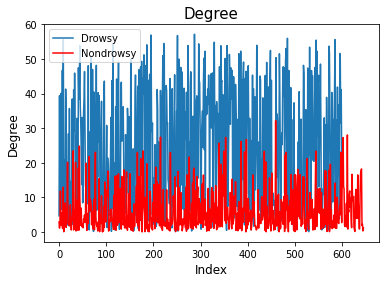

In [58]:
plt.plot(train_data_drowsy["degree"], label = "Drowsy")
plt.plot(train_data_notdrowsy["degree"], color='red', label = "Nondrowsy")
plt.xlabel("Index", fontsize = 12)
plt.ylabel("Degree", fontsize = 12)
plt.legend()
plt.title("Degree", fontsize =15)
plt.show()

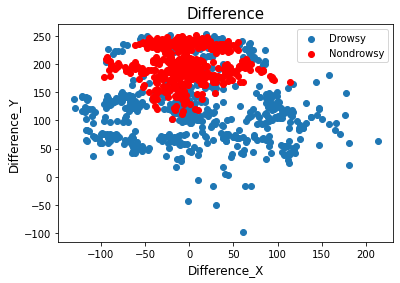

In [59]:
plt.scatter(train_data_drowsy["Diff_X"], train_data_drowsy["Diff_Y"], label = "Drowsy")
plt.scatter(train_data_notdrowsy["Diff_X"], train_data_notdrowsy["Diff_Y"], color='red', label = "Nondrowsy")
plt.xlabel("Difference_X", fontsize=12)
plt.ylabel("Difference_Y", fontsize=12)
plt.legend()
plt.title("Difference", fontsize=15)
plt.show()

In [60]:
train_data_drowsy = train_data_drowsy.drop(train_data_drowsy.columns[[1,2,3,4,5,6,7,8]], axis = 1)
train_data_notdrowsy = train_data_notdrowsy.drop(train_data_notdrowsy.columns[[1,2,3,4,5,6,7,8]], axis = 1)

In [61]:
train_data_drowsy = train_data_drowsy[['degree', 'Diff_X', 'Diff_Y', 'label']]
train_data_notdrowsy = train_data_notdrowsy[['degree', 'Diff_X', 'Diff_Y', 'label']]

In [62]:
DataSet = pd.concat([train_data_drowsy, train_data_notdrowsy], ignore_index= True)

In [67]:
DataSet.to_csv("/content/train_data.csv", index = False)

In [72]:
test = pd.read_csv("/content/train_data.csv")

In [69]:
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd

In [76]:
train_data = pd.read_csv("/content/train_data.csv")

In [77]:
file = np.genfromtxt('/content/train_data.csv', delimiter=',')
file = np.delete(file, (0), axis = 0)

In [78]:
feature = file[:,:-1].astype(np.float32)
label = file[:, -1].astype(np.float32)

In [79]:
knn = cv2.ml.KNearest_create()
knn.train(feature, cv2.ml.ROW_SAMPLE, label)

True